In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

In [3]:
def interpolacion_Lagrange(x_int,xn,yn):
    n=len(xn)-1
    
    def L(x,n,i):
        prod=1.
        for m in range(0,n+1):
            if m != i:
                prod*= (x-xn[m])/(xn[i]-xn[m])
        return prod
    
    suma=0
    for i in range(0,n+1):
        suma+=yn[i]*L(x_int,n,i)
    
    return suma

### Integrales numéricas

1. Sumas de Riemann
2. Reglas de Cuadratura
3. Reglas Compuestas
4. Cuadraturas de orden superior

In [4]:
xs = Symbol('x')

fx = 1+cos(xs)**2+xs 

Fx=integrate(fx,xs)

print('Función: ', fx)
print('Integral', Fx)

f = lambdify(xs,fx,"numpy")

F = lambdify(xs,Fx,"numpy")

Función:  x + cos(x)**2 + 1
Integral x**2/2 + 3*x/2 + sin(x)*cos(x)/2


# Integrales numéricas

#### Sumas de Riemann

$$\int_a^b dx f(x) = \lim_{\Delta_x \to 0}\sum_{i=1}^{N} f(x_i)\Delta x \approx \sum_{i=1}^{N} f(x_i)\Delta x$$

Area exacta:  4.245647748216941
Area Riemann:  4.26451533442725
Error 0.01886758621030893


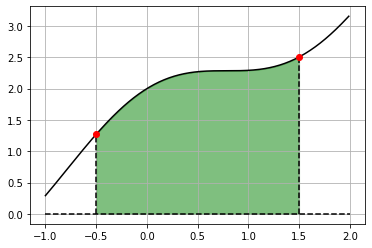

In [9]:
dx=0.01
xmin=-1
xmax=2

a=-0.5
b=1.5

x=np.arange(xmin,xmax,dx)

xf=np.arange(a,b+dx,dx)

plt.plot(x,f(x),color='black')
plt.plot(a,f(a),'o',color='red')
plt.plot(b,f(b),'o',color='red')
plt.vlines(a,0,f(a),linestyles='dashed')
plt.vlines(b,0,f(b),linestyles='dashed')
plt.hlines(0,xmin,xmax,linestyles='dashed')
plt.fill_between(xf,f(xf),color='green',alpha=0.5)
plt.grid()

def Ar(a,b):
    return F(b)-F(a)

print('Area exacta: ', Ar(a,b))
print('Area Riemann: ', sum(f(xf))*dx)
print('Error',abs(sum(f(xf))*dx-Ar(a,b)))

# Cuadratura numérica

$$a=x_0$$


$$b=x_n$$


$$n=N-1$$


$$f(x) \approx P_n(x) = \sum_{i}^{n} f(x_i) L_{n,i}(x)$$


$$L_{n,i}(x)=\prod_{m}^{n} \frac{x-x_m}{x_i-x_m} \text{ con } m\neq i$$


$$\int_a^b dx f(x) \approx \int_a^b dx P_n(x) = \int_a^b dx \sum_{i}^{n} f(x_i) L_{n,i}(x) = \sum_{i}^{n} \int_a^b dx f(x_i) L_{n,i}(x)$$


$$E[f] = \frac{1}{(n+1)!} \int_a^b dx \prod_i^n (x-x_i)f^{n+1}(\xi(x))$$

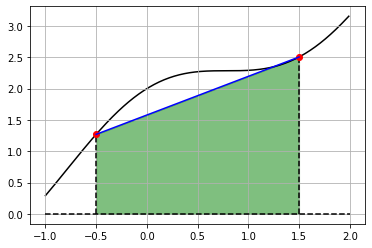

In [10]:
def Quadrature(N,f,a,b):
    xn=np.linspace(a,b,N)
    yn=f(xn)
    
    xf=np.arange(a,b+dx,dx)

    y=np.zeros(len(xf))
    for i in range(len(xf)):
        y[i]=interpolacion_Lagrange(xf[i],xn,yn)

    plt.plot(x,f(x),color='black',zorder=1)
    plt.plot(xn,yn,'o',color='red',zorder=2)
    plt.plot(xf,y,color='blue',zorder=3)
    plt.vlines(a,0,f(a),linestyles='dashed')
    plt.vlines(b,0,f(b),linestyles='dashed')
    plt.hlines(0,xmin,xmax,linestyles='dashed')
    plt.fill_between(xf,y,color='green',alpha=0.5)
    plt.grid(True)
    
N=2
a=-0.5
b=1.5
Quadrature(N,f,a,b)

# Regla del trapecio $N=2$

$$\int_a^b dx f(x) \approx \int_a^b dx P_1(x)$$

$$P_1(x)=f(x_0) \frac{x-x_1}{x_0-x_1} + f(x_1) \frac{x-x_0}{x_1-x_0}$$

$$P_1(x)=f(a) \frac{x-b}{a-b} + f(b) \frac{x-a}{b-a}$$

$$\int_a^b dx f(x) \approx \frac{1}{2} (b-a) (f(a)+f(b))$$

$$E[f]=\frac{(b-a)^3}{12} f''(\xi)$$

Area real: 4.245647748216941
Area trapecio: 3.7751549046338475


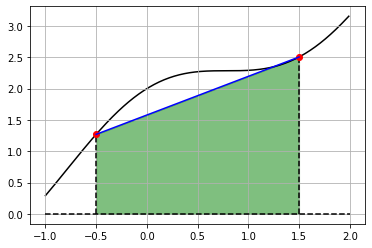

In [11]:
N=2
a=-0.5
b=1.5
Quadrature(N,f,a,b)

def Ar_trap(a,b):
    return 0.5*(b-a)*(f(a)+f(b))

print('Area real:', Ar(a,b))
print('Area trapecio:', Ar_trap(a,b))

# Regla de Simpson N=3

$$\int_a^b dx f(x) \approx \int_{x_0}^{x_2} dx P_2(x)$$

$$P_2(x)=f(x_0) \frac{x-x_1}{x_0-x_1}\frac{x-x_2}{x_0-x_2} + f(x_1) \frac{x-x_0}{x_1-x_0}\frac{x-x_2}{x_1-x_2} + f(x_2) \frac{x-x_0}{x_2-x_0}\frac{x-x_1}{x_2-x_1}$$

$$x_{i+1}=x_i+h \;; \forall i$$

$$\int_{x_0}^{x_2} dx f(x) \approx \frac{h}{3} (f(x_0)+4f(x_1)+f(x_2))$$

$$E[f]=\frac{h^5}{90} f^{(4)}(\xi)$$

Area real: 4.245647748216941
Area Trapecio: 3.7751549046338475
Area Simpson: 4.285253172123376


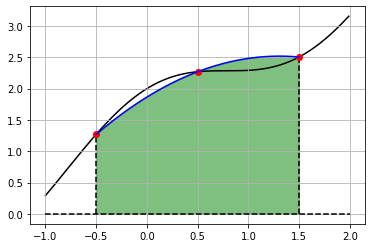

In [12]:
N=3
a=-0.5
b=1.5
Quadrature(N,f,a,b)

def Ar_simp(a,b):
    xn=np.linspace(a,b,3)
    h=xn[1]-xn[0]
    return(h/3.)*(f(xn[0])+4*f(xn[1])+f(xn[2]))

print('Area real:', Ar(a,b))
print('Area Trapecio:', Ar_trap(a,b))
print('Area Simpson:', Ar_simp(a,b))

# Reglas compuestas

$$\int_{x_0}^{x_n} dx f(x) = \int_{x_0}^{x_1} dx f(x) + \int_{x_1}^{x_2} dx f(x) + ... +\int_{x_{n-1}}^{x_n} dx f(x)$$

# Trapecio N=2 

dx: 1.0
Area real: 4.245647748216941
Area Trapecio compuesto: 4.157728605250994
Error: 0.08791914296594694


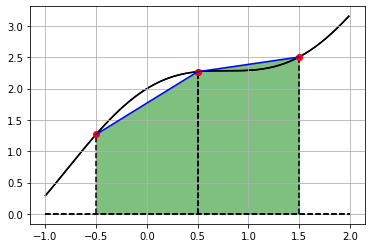

In [16]:
N=2
Ni=2
a=-0.5
b=1.5
hi=(b-a)/Ni

ab=np.linspace(a,b,Ni+1)

Ar_trap_comp=0

for i in range(0,Ni):
    #a=ab[i]
    #b=ab[i+1]
    Quadrature(N,f,ab[i],ab[i+1])
    Ar_trap_comp+=Ar_trap(ab[i],ab[i+1])

print('dx:', hi)
print('Area real:', Ar(a,b))
print('Area Trapecio compuesto:', Ar_trap_comp)
print('Error:',abs(Ar_trap_comp-Ar(a,b)))

# Simpson N=3 

dx: 1.0
Area real: 4.245647748216941
Area Trapecio compuesto: 4.157728605250994
Error: 0.08791914296594694
Area Simpson compuesto: 4.247193922901284
Error: 0.001546174684342816


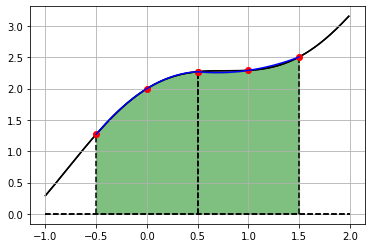

In [20]:
N=3
Ni=2
a=-0.5
b=1.5
hi=(b-a)/Ni

ab=np.linspace(a,b,Ni+1)

Ar_trap_comp=0
Ar_simp_comp=0

for i in range(0,Ni):
    #a=ab[i]
    #b=ab[i+1]
    Quadrature(N,f,ab[i],ab[i+1])
    Ar_trap_comp+=Ar_trap(ab[i],ab[i+1])
    Ar_simp_comp+=Ar_simp(ab[i],ab[i+1])

print('dx:', hi)
print('Area real:', Ar(a,b))
print('Area Trapecio compuesto:', Ar_trap_comp)
print('Error:',abs(Ar_trap_comp-Ar(a,b)))
print('Area Simpson compuesto:', Ar_simp_comp)
print('Error:',abs(Ar_simp_comp-Ar(a,b)))

# Cuadraturas de orden superior $N=4$

#### Simpson’s Three-Eighths rule


In [22]:
def lag(n):
    x = Symbol('x')
    def L(n,i):
        xi=Symbol('x%s'%i)
        prod=1.
        for m in range(n+1):
            if m != i:
                xm = Symbol('x%s'%m)
                prod*=(x-xm)/(xi-xm)
        return prod
    suma=0
    for i in range(0,n+1):
        string='f%s'%i
        yi=Symbol(string)
        suma+=yi*L(n,i)
    
    return suma



In [23]:
for n in range(1,4):
    print('N:',n+1)
    a=Symbol('x0')
    b=Symbol('x%s'%n) 
    h=Symbol('h')

    L=lag(n)
    integral=integrate(L,(xs,a,b))

    
    for i in range(0,n):
        xi=Symbol('x%s'%i)
        xi1=Symbol('x%s'%(i+1))
        integral=integral.subs(xi,xi1-h)
    

    integral=integral.subs(xi1,0)
    integral=simplify(integral)
    integral=nsimplify(integral)
    print(integral)
    print('-----------')


N: 2
h*(f0 + f1)/2
-----------
N: 3
h*(f0/3 + 4*f1/3 + f2/3)
-----------
N: 4
h*(3*f0/8 + 9*f1/8 + 9*f2/8 + 3*f3/8)
-----------


Area real: 4.245647748216941
Area Trapecio: 3.7751549046338475
Area Simpson: 4.285253172123376
Area N=4: 4.262251250521097
-------------------
Error Trapecio 0.4704928435830933
Error Simpson 0.03960542390643518
Error N=4 0.016603502304156414


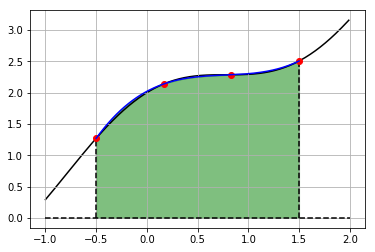

In [ ]:
N=4
a=-0.5
b=1.5
Quadrature(N,f,a,b)

def Ar_sup(a,b):
    xn=np.linspace(a,b,N)
    h=xn[1]-xn[0]
    
    f0=f(xn[0])
    f1=f(xn[1])
    f2=f(xn[2])
    f3=f(xn[3])
    
    return h*(3*f0/8 + 9*f1/8 + 9*f2/8 + 3*f3/8)

print('Area real:', Ar(a,b))
print('Area Trapecio:', Ar_trap(a,b))
print('Area Simpson:', Ar_simp(a,b))
print('Area N=4:', Ar_sup(a,b))
print('-------------------')
print('Error Trapecio', abs(Ar_trap(a,b)-Ar(a,b)))
print('Error Simpson', abs(Ar_simp(a,b)-Ar(a,b)))
print('Error N=4', abs(Ar_sup(a,b)-Ar(a,b)))